# All imports 

In [2]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow --ignore-installed 

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
     ---------------------------------------- 2.6/2.6 MB 2.0 MB/s eta 0:00:00
  Using cached libclang-15.0.6.1-py2.py3-none-win_amd64.whl (23.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 14.9/14.9 MB 3.6 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.2/1.2 MB 2.2 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.w

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
import tensorflow as tf

In [12]:
import pyforest
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Read file 

In [22]:
df=pd.read_csv("E:\crome downloades\Excelr/forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(517, 31)

In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [23]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [24]:
df[df.duplicated()].shape

(8, 31)

In [25]:
df=df.drop_duplicates()

In [26]:
df.shape

(509, 31)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder=LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [29]:
df=df.drop(df.columns[10:30],axis=1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


In [31]:
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [32]:
df['month']=df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(0,1,2,3,4,5,6,7,8,9,10,11))

In [33]:
df['day']=df['day'].replace(('sun','mon','tue','wed','thu','fri','sat'),(0,1,2,3,4,5,6))

In [34]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


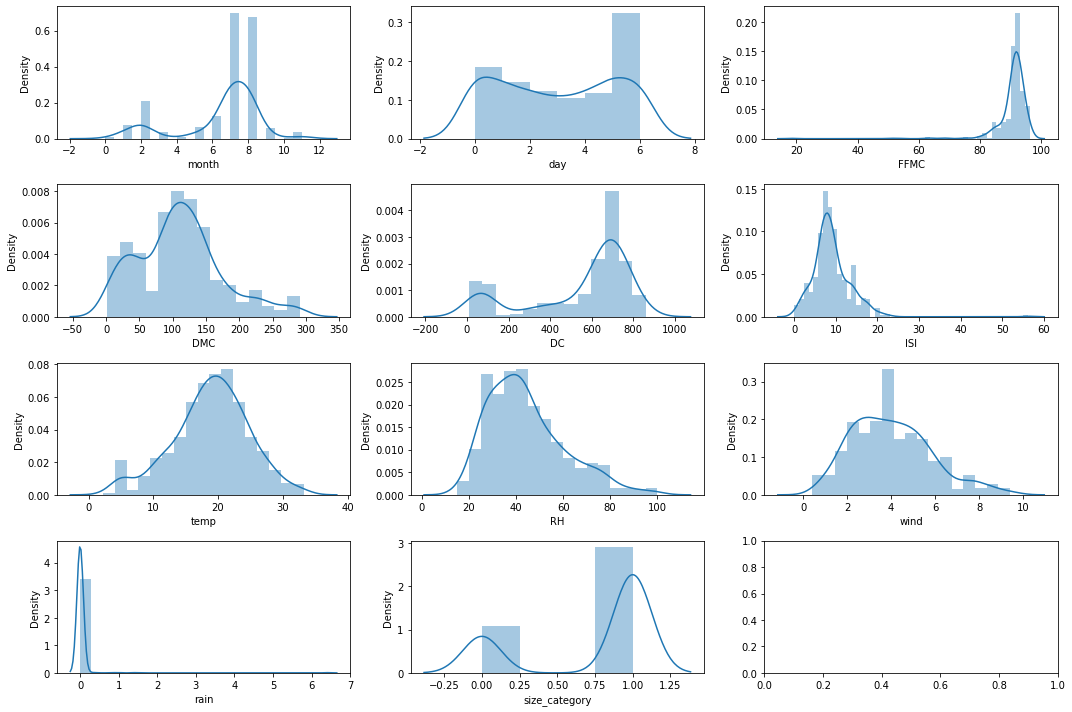

In [36]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(df.month, ax=ax[0,0])
sns.distplot(df.day, ax=ax[0,1])
sns.distplot(df.FFMC, ax=ax[0,2])
sns.distplot(df.DMC, ax=ax[1,0])
sns.distplot(df.DC, ax=ax[1,1])
sns.distplot(df.ISI, ax=ax[1,2])
sns.distplot(df.temp, ax=ax[2,0])
sns.distplot(df.RH, ax=ax[2,1])
sns.distplot(df.wind, ax=ax[2,2])
sns.distplot(df.rain, ax=ax[3,0])
sns.distplot(df['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

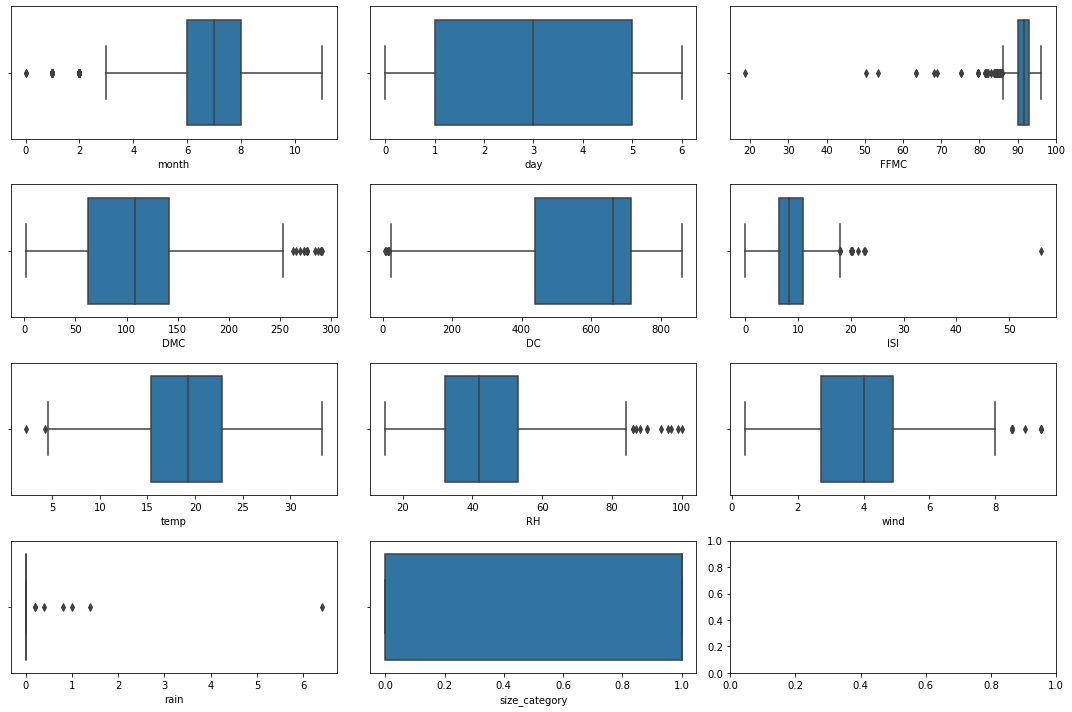

In [37]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(df.month, ax=ax[0,0])
sns.boxplot(df.day, ax=ax[0,1])
sns.boxplot(df.FFMC, ax=ax[0,2])
sns.boxplot(df.DMC, ax=ax[1,0])
sns.boxplot(df.DC, ax=ax[1,1])
sns.boxplot(df.ISI, ax=ax[1,2])
sns.boxplot(df.temp, ax=ax[2,0])
sns.boxplot(df.RH, ax=ax[2,1])
sns.boxplot(df.wind, ax=ax[2,2])
sns.boxplot(df.rain, ax=ax[3,0])
sns.boxplot(df['size_category'], ax=ax[3,1])

plt.tight_layout()
plt.show()

In [38]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [40]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [41]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [46]:
model=Sequential()
model.add(Dense(12,input_dim=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='linear'))

In [53]:
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

In [54]:
#model.fit(X,Y,epochs=100,batch_size=10,validation_split=0.33)
history=model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 0.2422 - accuracy: 0.6246 - val_loss: 0.3269 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.7478 - val_loss: 0.2721 - val_accuracy: 0.6667
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2042 - accuracy: 0.7507 - val_loss: 0.3428 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1948 - accuracy: 0.7302 - val_loss: 0.4645 - val_accuracy: 0.3810
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.7419 - val_loss: 0.3786 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.7478 - val_loss: 0.3994 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.7243 - val_loss: 0.5135 - val_accuracy: 0.6726
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1814 - accuracy: 0.7595 - val_loss: 0.3367 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.7566 - val_loss: 0.2306 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.7625 - val_loss: 0.2497 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.7654 - val_loss: 0.2525 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1847 - accuracy: 0.7625 - val_loss: 0.3179 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1802 - accuracy: 0.7683 - val_loss: 0.2835 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1821 - accuracy: 0.7683 - val_loss: 0.2394 - val_accuracy: 0.6726
Epoch 

In [55]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.7367
accuracy: 54.28%


In [56]:
model.history.history.keys()

dict_keys([])

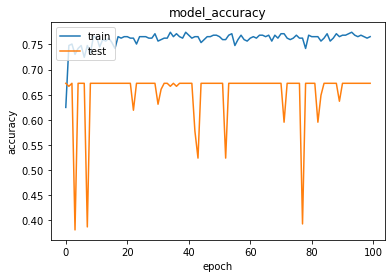

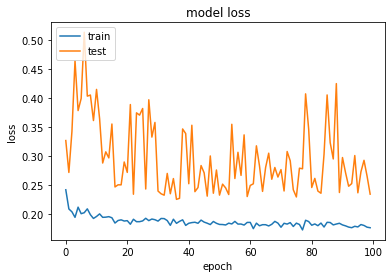

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
T